<a href="https://colab.research.google.com/github/bibekebib/Nepali-Letters-and-Numbers-classification-generation/blob/main/Nepali_handwriting_(Consonants)_Prediction_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import tqdm
import cv2
import torch.nn as nn
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch
import torchvision.transforms as T

In [79]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [80]:
# !git clone https://github.com/kcnishan/Nepali_handwritten_digits_recognition.git

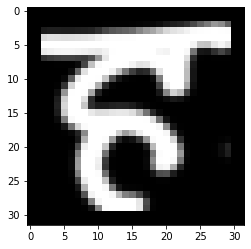

In [81]:
plt.imshow(cv2.imread('/content/Nepali_handwritten_digits_recognition/dataset/Test/consonants/character_33_ha/14884.png'))
plt.show()

In [82]:
X_img = []
train_path = '/content/Nepali_handwritten_digits_recognition/dataset/Train/consonants'
Test_path = '/content/Nepali_handwritten_digits_recognition/dataset/Test/consonants'
for each in os.listdir('/content/Nepali_handwritten_digits_recognition/dataset/Train/consonants'):
  print(each)
  for x in os.listdir(train_path+'/'+each):
    X_img.append([train_path+'/'+each+'/'+x, each])
    break

character_16_tabala
character_1_ka
character_24_bha
character_2_kha
character_3_ga
character_6_cha
character_33_ha
character_17_tha
character_28_la
character_4_gha
character_14_dhaa
character_27_ra
character_30_motosaw
character_19_dha
character_29_waw
character_25_ma
character_26_yaw
character_15_adna
character_7_chha
character_18_da
character_36_gya
character_35_tra
character_10_yna
character_9_jha
character_21_pa
character_23_ba
character_12_thaa
character_22_pha
character_31_petchiryakha
character_11_taamatar
character_8_ja
character_34_chhya
character_13_daa
character_5_kna
character_32_patalosaw
character_20_na


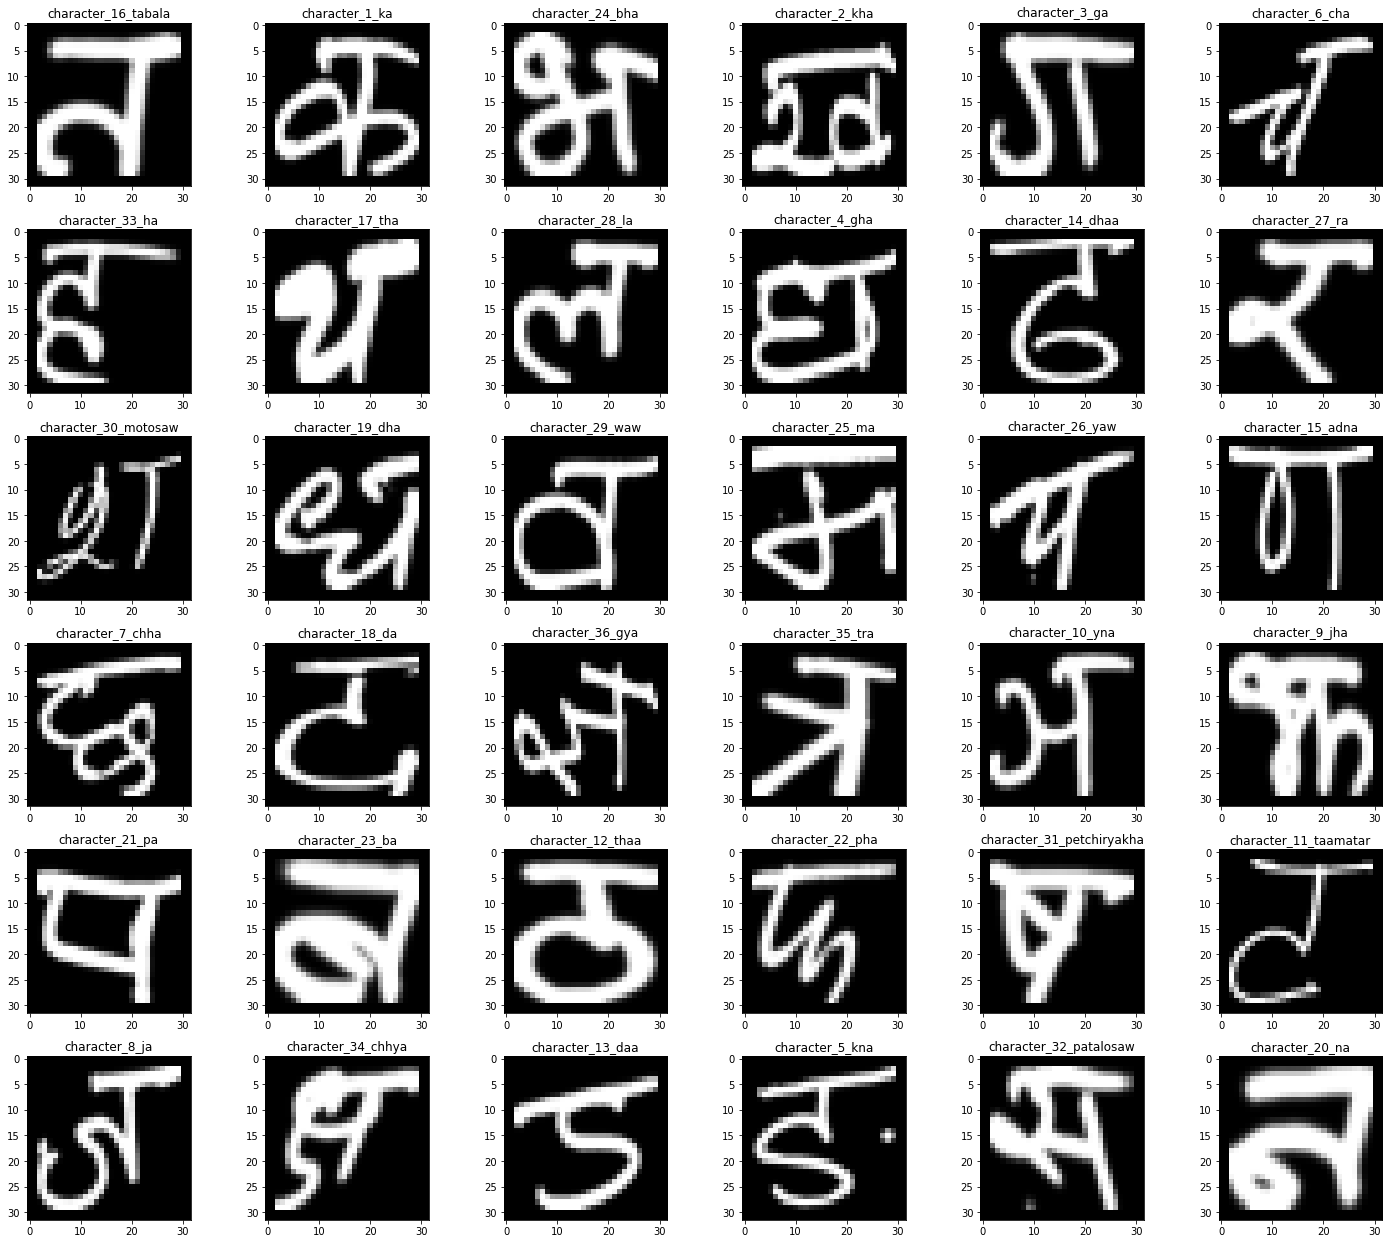

In [83]:
plt.figure(figsize=(20,20)) # specifying the overall grid size

for i in range(36):
    plt.subplot(7,6,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(cv2.imread(X_img[i][0]))
    plt.title(X_img[i][1])
    plt.tight_layout(pad=1.0)
plt.show()

In [95]:
img_path = []
label = []
for each in os.listdir(train_path):
  for x in os.listdir(train_path+'/'+each):
    img_path.append(train_path+'/'+each+'/'+x)
    label.append(each)

In [85]:
import os
from os import listdir
from PIL import Image

In [86]:
count= 0
for each in os.listdir(Test_path):
  for x in os.listdir(Test_path+'/'+each):
    if x.endswith('.png'):
      try:
        img = Image.open(Test_path+'/'+each+'/'+x)
        img.verify()
      except:
        print(each+'/'+x)
    else:
      print(each+'/'+x)

In [87]:
# !rm -r '/content/Nepali_handwritten_digits_recognition/dataset/Test/consonants/character_22_pha/character_1_ka'

In [98]:
img_path_test = []
label_test = []
for each in os.listdir(Test_path):
  for x in os.listdir(Test_path+'/'+each):
    img_path_test.append(Test_path+'/'+each+'/'+x)
    label_test.append(each)

In [112]:
df = pd.DataFrame(list(zip(img_path, label)), columns=['path', 'label'])

In [113]:
df_test = pd.DataFrame(list(zip(img_path_test, label_test)), columns=['path', 'label'])

In [114]:
df.head()

,path,label
0,/content/Nepali_handwritten_digits_recognition...,character_16_tabala
1,/content/Nepali_handwritten_digits_recognition...,character_16_tabala
2,/content/Nepali_handwritten_digits_recognition...,character_16_tabala
3,/content/Nepali_handwritten_digits_recognition...,character_16_tabala
4,/content/Nepali_handwritten_digits_recognition...,character_16_tabala


In [115]:
df_test.head()

,path,label
0,/content/Nepali_handwritten_digits_recognition...,character_16_tabala
1,/content/Nepali_handwritten_digits_recognition...,character_16_tabala
2,/content/Nepali_handwritten_digits_recognition...,character_16_tabala
3,/content/Nepali_handwritten_digits_recognition...,character_16_tabala
4,/content/Nepali_handwritten_digits_recognition...,character_16_tabala


In [116]:
cv2.imread(df.path[0]).shape

(32, 32, 3)

In [117]:
LbE = LabelEncoder()
LbE.fit(df.label)
df.label =  LbE.transform(df.label)
df_test.label =  LbE.transform(df_test.label)

In [118]:
le_name_mapping = dict(zip(LbE.classes_, LbE.transform(LbE.classes_)))
le_name_mapping

{'character_10_yna': 0,
 'character_11_taamatar': 1,
 'character_12_thaa': 2,
 'character_13_daa': 3,
 'character_14_dhaa': 4,
 'character_15_adna': 5,
 'character_16_tabala': 6,
 'character_17_tha': 7,
 'character_18_da': 8,
 'character_19_dha': 9,
 'character_1_ka': 10,
 'character_20_na': 11,
 'character_21_pa': 12,
 'character_22_pha': 13,
 'character_23_ba': 14,
 'character_24_bha': 15,
 'character_25_ma': 16,
 'character_26_yaw': 17,
 'character_27_ra': 18,
 'character_28_la': 19,
 'character_29_waw': 20,
 'character_2_kha': 21,
 'character_30_motosaw': 22,
 'character_31_petchiryakha': 23,
 'character_32_patalosaw': 24,
 'character_33_ha': 25,
 'character_34_chhya': 26,
 'character_35_tra': 27,
 'character_36_gya': 28,
 'character_3_ga': 29,
 'character_4_gha': 30,
 'character_5_kna': 31,
 'character_6_cha': 32,
 'character_7_chha': 33,
 'character_8_ja': 34,
 'character_9_jha': 35}

In [119]:
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_test.iloc[302]

path     /content/Nepali_handwritten_digits_recognition...
label                                                   31
Name: 302, dtype: object

In [120]:
from PIL import Image

def test_img(img_path):
  try:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    im_pil = Image.fromarray(img)

# For reversing the operation:
    im_np = np.asarray(im_pil)
  except:
    path = img_path
    return path

In [121]:
for each in df_test.path:
  test_img(each)

In [122]:
df = df.sample(frac=1).reset_index(drop=True)


In [123]:
transpose = T.Compose(
   [T.ToPILImage(),
    T.ToTensor(),  
    T.Normalize(
       mean=[0.485, 0.456, 0.406],
       std=[0.229, 0.224, 0.225]
   ),
    T.Grayscale(num_output_channels=1)
    ]
)

test_transpose = T.Compose(
   [
    T.ToTensor(),  
    T.Normalize(
       mean=[0.485, 0.456, 0.406],
       std=[0.229, 0.224, 0.225]
   ),
    T.Grayscale(num_output_channels=1)
    ]
)

In [124]:
class LetterDataset(Dataset):
  def __init__(self, df, transpose):
    self.fpath = df.path
    self.label = df.label
    self.transform = transpose

  def __len__(self):
    return len(self.fpath)
  
  def __getitem__(self, ix):
    img = self.fpath[ix]
    target = self.label[ix]
    img = cv2.imread(img)
    im = self.transform(img)
    return torch.tensor(im/255).to(device).float(), torch.tensor(target).long().to(device)

torch.Size([1, 32, 32])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  from ipykernel import kernelapp as app


Text(0.5, 1.0, "tensor(10, device='cuda:0')")

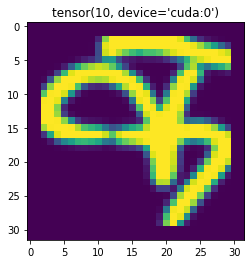

In [125]:
data =  LetterDataset(df, transpose)
img, label = data[20000]
print(img.shape)
plt.imshow(img.cpu().reshape(32,32))
plt.title(label)


torch.Size([1, 32, 32])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  from ipykernel import kernelapp as app


Text(0.5, 1.0, "tensor(13, device='cuda:0')")

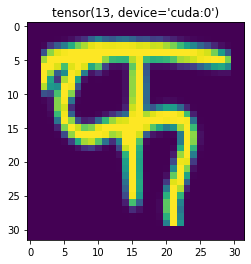

In [126]:
data =  LetterDataset(df_test, test_transpose)
img, label = data[2]
print(img.shape)
plt.imshow(img.cpu().reshape(32,32))
plt.title(label)

In [127]:
def conv_layer(ni, no, kernel_size, max_pool_num=2, stride=1,):
  return nn.Sequential(
      nn.Conv2d(ni, no, kernel_size, stride),
      nn.BatchNorm2d(no),
      nn.LeakyReLU(0.2),
      nn.MaxPool2d(max_pool_num)
  )

In [128]:
from torch.nn.modules.activation import Softmax
def get_model():
  model = nn.Sequential(
      conv_layer(1,8,2),
      conv_layer(8,16, 2),
      conv_layer(16, 64, 2),
      nn.Flatten(),
      nn.Linear(64*3*3,192),
      nn.ReLU(),
      nn.Linear(192, 64),
      nn.ReLU(),
      nn.Linear(64, 36),
      nn.Softmax()
  ).to(device)
  loss_fn = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
  return model, loss_fn, optimizer

In [129]:
def calculateHWOUT(H_in, W_IN, padding, kernel_size, stride, max_pool_num):
    H_out = (((H_in + 2*padding - kernel_size) / stride ) +1) / max_pool_num
    W_out = (((W_IN + 2*padding - kernel_size) / stride ) +1) / max_pool_num
    return (round(H_out), round(W_out))

In [130]:
calculateHWOUT(H_in=4, W_IN=4, padding=0, kernel_size=2, stride=1, max_pool_num=2)

(2, 2)

In [131]:
model, loss_fn, optimizer = get_model()

In [132]:
from torchsummary import summary
summary(model, (1, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 31, 31]              40
       BatchNorm2d-2            [-1, 8, 31, 31]              16
         LeakyReLU-3            [-1, 8, 31, 31]               0
         MaxPool2d-4            [-1, 8, 15, 15]               0
            Conv2d-5           [-1, 16, 14, 14]             528
       BatchNorm2d-6           [-1, 16, 14, 14]              32
         LeakyReLU-7           [-1, 16, 14, 14]               0
         MaxPool2d-8             [-1, 16, 7, 7]               0
            Conv2d-9             [-1, 64, 6, 6]           4,160
      BatchNorm2d-10             [-1, 64, 6, 6]             128
        LeakyReLU-11             [-1, 64, 6, 6]               0
        MaxPool2d-12             [-1, 64, 3, 3]               0
          Flatten-13                  [-1, 576]               0
           Linear-14                  [

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [133]:
def get_data():
  data =  LetterDataset(df, transpose)
  trn_ldr = DataLoader(data, batch_size=32, shuffle=True)
  data_test = LetterDataset(df_test, test_transpose)
  test_ldr = DataLoader(data_test, batch_size=32)
  return trn_ldr, test_ldr

In [134]:
def train_batch(x, y, model, loss_fn, optimizer):
  model.train()
  pred = model(x)
  batch_loss = loss_fn(pred, y)
  batch_loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  return batch_loss.item()

In [135]:
@torch.no_grad()
def accuracy(x, y, model):
  model.eval()
  pred = model(x)
  _, is_correct = torch.max(pred.data,1)
  acc_all = (is_correct==y).detach().cpu().numpy()
  return acc_all

In [136]:
@torch.no_grad()
def val_loss_trn(x, y, model, loss_fn):
  prediction = model(x)
  val_loss = loss_fn(prediction, y)

  return val_loss.item()

In [138]:
trn_ldr, test_ldr = get_data()
model, loss_fn, optimizer = get_model()


In [140]:
train_loss = []
train_accuracies= []
val_loss = [] 
val_accuracies = []

for i in range(20):
  print(f'Epoch: _________*****{i}*****_______')
  train_epoch_losses, train_epoch_accuracies = [], []
  val_epoch_accuracies, val_epoch_losses = [], []



  for ix, batch in (enumerate(iter(trn_ldr))):
      x, y = batch
      train_epoch_losses.append(train_batch(x, y, model, loss_fn, optimizer))
  train_epoch_loss = np.array(train_epoch_losses).mean()
  print(f'Epoch: _________*****{i} Training Loss : {train_epoch_loss} *****_______')



  for ix, batch in (enumerate(iter(trn_ldr))):
    x, y = batch
    train_epoch_accuracies.append(sum(accuracy(x, y, model)) / len(y))
  train_epoch_accuracy = np.array(train_epoch_accuracies).mean()
  print(f'Epoch: _________*****{i} Training Accuracy: {train_epoch_accuracy} *****_______')



  for ix, batch in (enumerate(iter(test_ldr))):
    x, y = batch
    val_epoch_losses.append(val_loss_trn(x, y, model, loss_fn))
  val_epoch_loss = np.array(val_epoch_losses).mean()
  print(f'Epoch: _________*****{i} Validation Loss : {val_epoch_loss} *****_______')

  for ix, batch in (enumerate(iter(test_ldr))):
    x, y = batch
    val_epoch_accuracies.append(sum(accuracy(x, y, model)) / len(y))
  val_epoch_accuracy = np.array(val_epoch_accuracies).mean()
  print(f'Epoch: _________*****{i} Validation Accuracy. {val_epoch_accuracy} *****_______')
  print('\n')

  train_loss.append(train_epoch_loss)
  train_accuracies.append(train_epoch_accuracy)
  val_accuracies.append(val_epoch_accuracy)
  val_loss.append(val_epoch_loss)

Epoch: _________*****0*****_______


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  from ipykernel import kernelapp as app


Epoch: _________*****0 Training Loss : 3.0713300267502204 *****_______
Epoch: _________*****0 Training Accuracy: 0.4070014375326712 *****_______
Epoch: _________*****0 Validation Loss : 3.2266234864850016 *****_______
Epoch: _________*****0 Validation Accuracy. 0.4044008875739645 *****_______


Epoch: _________*****1*****_______
Epoch: _________*****1 Training Loss : 3.0045334526337197 *****_______
Epoch: _________*****1 Training Accuracy: 0.33994380554103504 *****_______
Epoch: _________*****1 Validation Loss : 3.290610943320235 *****_______
Epoch: _________*****1 Validation Accuracy. 0.33940458579881655 *****_______


Epoch: _________*****2*****_______
Epoch: _________*****2 Training Loss : 2.942658168510561 *****_______
Epoch: _________*****2 Training Accuracy: 0.6661820439100888 *****_______
Epoch: _________*****2 Validation Loss : 2.9698341301912388 *****_______
Epoch: _________*****2 Validation Accuracy. 0.6621671597633136 *****_______


Epoch: _________*****3*****_______
Epoch: 

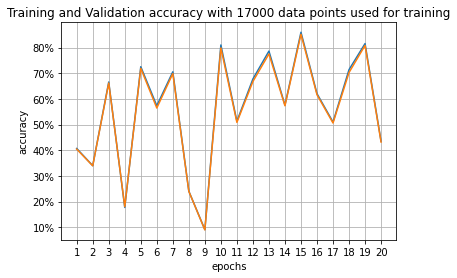

In [141]:
epochs = np.arange(20) + 1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(epochs, train_accuracies , label='Training accuracy')
plt.plot(epochs, val_accuracies, label='Val_accuracy')
plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(1))
plt.title('Training and Validation accuracy with 17000 data points used for training')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.grid('off')
plt.show()

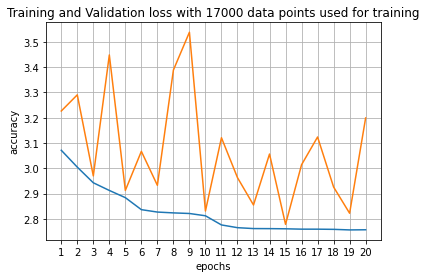

In [142]:
epochs = np.arange(20) + 1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(epochs, train_loss , label='Training loss')
plt.plot(epochs, val_loss, label='Val_loss')
plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(1))
plt.title('Training and Validation loss with 17000 data points used for training')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.grid('off')
plt.show()

In [143]:
def preprocess_predict_data(img_path):
  img = cv2.imread(img_path)
  transform = T.Compose(
   [T.ToPILImage(),
    T.ToTensor(),  
    T.Normalize(
       mean=[0.485, 0.456, 0.406],
       std=[0.229, 0.224, 0.225]
   ),
    T.Grayscale(num_output_channels=1)
    ]
  )
  img = transform(img).to(device)
  return img

def predict(x, model):
  img = preprocess_predict_data(x)
  img = img.unsqueeze_(0)
  pred = model(img)
  return torch.max(pred.data, 1)

torch.return_types.max(
values=tensor([1.], device='cuda:0'),
indices=tensor([21], device='cuda:0'))


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


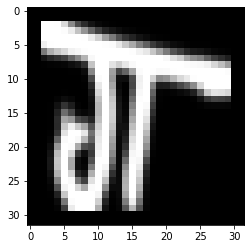

In [146]:
img_path = '/content/Nepali_handwritten_digits_recognition/dataset/Test/consonants/character_3_ga/11892.png'
# img = preprocess_predict_data(img_path)
pred = predict(img_path, model)
print(pred)
plt.imshow(cv2.imread(img_path))

torch.return_types.max(
values=tensor([1.], device='cuda:0'),
indices=tensor([24], device='cuda:0'))


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


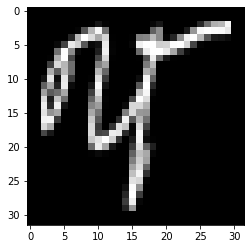

In [147]:
img_path = '/content/Nepali_handwritten_digits_recognition/dataset/Test/consonants/character_17_tha/1014.png'
pred = predict(img_path, model)
print(pred)
plt.imshow(cv2.imread(img_path))

In [145]:
le_name_mapping

{'character_10_yna': 0,
 'character_11_taamatar': 1,
 'character_12_thaa': 2,
 'character_13_daa': 3,
 'character_14_dhaa': 4,
 'character_15_adna': 5,
 'character_16_tabala': 6,
 'character_17_tha': 7,
 'character_18_da': 8,
 'character_19_dha': 9,
 'character_1_ka': 10,
 'character_20_na': 11,
 'character_21_pa': 12,
 'character_22_pha': 13,
 'character_23_ba': 14,
 'character_24_bha': 15,
 'character_25_ma': 16,
 'character_26_yaw': 17,
 'character_27_ra': 18,
 'character_28_la': 19,
 'character_29_waw': 20,
 'character_2_kha': 21,
 'character_30_motosaw': 22,
 'character_31_petchiryakha': 23,
 'character_32_patalosaw': 24,
 'character_33_ha': 25,
 'character_34_chhya': 26,
 'character_35_tra': 27,
 'character_36_gya': 28,
 'character_3_ga': 29,
 'character_4_gha': 30,
 'character_5_kna': 31,
 'character_6_cha': 32,
 'character_7_chha': 33,
 'character_8_ja': 34,
 'character_9_jha': 35}